<a href="https://colab.research.google.com/github/Ehsan1997/RandomForestPractice/blob/master/Bulldozer_Kaggle_Comp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Some Collab stuff to do!

In [2]:
  !curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [3]:
!pip install fastai==0.7.0

     |████████████████████████████████| 122kB 9.2MB/s 
     |████████████████████████████████| 1.5MB 27.6MB/s 
     |████████████████████████████████| 496.4MB 29kB/s 
  Created wheel for bcolz: filename=bcolz-1.2.1-cp36-cp36m-linux_x86_64.whl size=2665644 sha256=6dda41ee38689a16553c43f8f5f501918f745aa9a7a957319737451dd29187f4
  Stored in directory: /root/.cache/pip/wheels/9f/78/26/fb8c0acb91a100dc8914bf236c4eaa4b207cb876893c40b745
Successfully built bcolz
ERROR: torchvision 0.4.2 has requirement torch==1.3.1, but you'll have torch 0.3.1 which is incompatible.
  Found existing installation: torch 1.3.1
    Uninstalling torch-1.3.1:
      Successfully uninstalled torch-1.3.1
  Found existing installation: fastai 1.0.59
    Uninstalling fastai-1.0.59:
      Successfully uninstalled fastai-1.0.59


In [0]:
# from google.colab import drive
# drive.mount('/content/gdrive', force_remount=True)
# root_dir = "/content/gdrive/My Drive/"
# base_dir = root_dir + 'fastai-v3/'

# Alright, Now for the real stuff.

In [0]:
from fastai.imports import *
from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn import metrics

In [0]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

## Umm.. Actually We need the data first.

We need to get a new download token each time. So update this cell before running all cells.

In [7]:
!curl 'https://storage.googleapis.com/kaggle-competitions-data/kaggle/3316/Train.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1575464156&Signature=i1J9YHfQeZ3MBYubFTQqBYPL2IEBjsODAh5ckhsDRuJMsPnmT7u28EYtvK9o4iVeK%2BbLtfsNjxnKAY5GCx%2FvcKAPQisE%2BG1hZZD%2F9lndWvlrdpHzQcuMxL%2FWTCFZ2m6EvR2t5lyOMqhuDnJfEVP6Td3mAxO%2BWarG5dqOm8m3HPiYOeEh4wMEfJs8as6rwtmSbl%2BLrdMXx7X1JOXSErLCF6BCNq0JbmRSI4uTE1NMg%2BMw4yiz4kNPEQravlJTZVClbXPDiDA%2FctUZaA2Q%2Fe7l6psPeEkF74QlRY8bz8Xn962YOUokGYELIc8u0eni9X%2F%2BmfTJ8PIE%2FcAM11qSW9fPzA%3D%3D' -H 'User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:70.0) Gecko/20100101 Firefox/70.0' -H 'Accept: text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8' -H 'Accept-Language: en-US,en;q=0.5' --compressed -H 'Referer: https://www.kaggle.com/' -H 'Connection: keep-alive' -H 'Upgrade-Insecure-Requests: 1' -H 'TE: Trailers' -o data/Train.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 9504k  100 9504k    0     0  9400k      0  0:00:01  0:00:01 --:--:-- 9400k


In [8]:
!unzip data/Train.zip -d data/

Archive:  data/Train.zip
  inflating: data/Train.csv          


In [9]:
! ls data/

Train.csv  Train.zip


In [0]:
!mkdir data/bulldozer_kaggle_comp 

In [0]:
!mv data/Train.zip data/Train.csv data/bulldozer_kaggle_comp/

## Alright!! We got the data, now for some preprocessing

### First ofcourse, we need to view it using a pandas dataframe.

In [0]:
df_raw = pd.read_csv('data/bulldozer_kaggle_comp/Train.csv', low_memory=False, parse_dates=['saledate'])

In [0]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [14]:
display_all(df_raw.tail().T)

,401120,401121,401122,401123,401124
SalesID,6333336,6333337,6333338,6333341,6333342
SalePrice,10500,11000,11500,9000,7750
MachineID,1840702,1830472,1887659,1903570,1926965
ModelID,21439,21439,21439,21435,21435
datasource,149,149,149,149,149
auctioneerID,1,1,1,2,2
YearMade,2005,2005,2005,2005,2005
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,2011-11-02 00:00:00,2011-11-02 00:00:00,2011-11-02 00:00:00,2011-10-25 00:00:00,2011-10-25 00:00:00


In [15]:
display_all(df_raw.describe(include='all').T)

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
SalesID,401125,NaN,NaN,NaN,NaT,NaT,1.91971e+06,909021,1.13925e+06,1.41837e+06,1.63942e+06,2.24271e+06,6.33334e+06
SalePrice,401125,NaN,NaN,NaN,NaT,NaT,31099.7,23036.9,4750,14500,24000,40000,142000
MachineID,401125,NaN,NaN,NaN,NaT,NaT,1.2179e+06,440992,0,1.0887e+06,1.27949e+06,1.46807e+06,2.48633e+06
ModelID,401125,NaN,NaN,NaN,NaT,NaT,6889.7,6221.78,28,3259,4604,8724,37198
datasource,401125,NaN,NaN,NaN,NaT,NaT,134.666,8.96224,121,132,132,136,172
auctioneerID,380989,NaN,NaN,NaN,NaT,NaT,6.55604,16.9768,0,1,2,4,99
YearMade,401125,NaN,NaN,NaN,NaT,NaT,1899.16,291.797,1000,1985,1995,2000,2013
MachineHoursCurrentMeter,142765,NaN,NaN,NaN,NaT,NaT,3457.96,27590.3,0,0,0,3025,2.4833e+06
UsageBand,69639,3,Medium,33985,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
saledate,401125,3919,2009-02-16 00:00:00,1932,1989-01-17,2011-12-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
df_raw.SalePrice = np.log(df_raw.SalePrice)

In [0]:
# m = RandomForestRegressor(n_jobs=-1)
# m.fit(df_raw.drop('SalePrice', 1), df_raw.SalePrice)

In [18]:
add_datepart(df_raw, 'saledate')
df_raw.saleYear.head()

0    2006
1    2004
2    2004
3    2011
4    2009
Name: saleYear, dtype: int64

In [0]:
train_cats(df_raw)

In [20]:
df_raw.UsageBand.cat.categories

Index(['High', 'Low', 'Medium'], dtype='object')

In [0]:
df_raw.UsageBand.cat.set_categories(['High', 'Medium', 'Low'], ordered=True, inplace=True)

In [0]:
df_raw.UsageBand = df_raw.UsageBand.cat.codes

In [23]:
display_all(df_raw.isnull().sum().sort_index()/len(df_raw))

Backhoe_Mounting            0.803872
Blade_Extension             0.937129
Blade_Type                  0.800977
Blade_Width                 0.937129
Coupler                     0.466620
Coupler_System              0.891660
Differential_Type           0.826959
Drive_System                0.739829
Enclosure                   0.000810
Enclosure_Type              0.937129
Engine_Horsepower           0.937129
Forks                       0.521154
Grouser_Tracks              0.891899
Grouser_Type                0.752813
Hydraulics                  0.200823
Hydraulics_Flow             0.891899
MachineHoursCurrentMeter    0.644089
MachineID                   0.000000
ModelID                     0.000000
Pad_Type                    0.802720
Pattern_Changer             0.752651
ProductGroup                0.000000
ProductGroupDesc            0.000000
ProductSize                 0.525460
Pushblock                   0.937129
Ride_Control                0.629527
Ripper                      0.740388
S

In [0]:
os.makedirs('tmp', exist_ok=True)
df_raw.to_feather('tmp/bulldozers-raw')

In [0]:
df_raw = pd.read_feather('tmp/bulldozers-raw')

In [0]:
df, y, nas = proc_df(df_raw, 'SalePrice')

In [27]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(df, y)
m.score(df, y)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9831470649913122

In [28]:
def split_vals(a, n): return a[:n].copy(), a[n:].copy()

n_valid = 12000
n_trn = len(df) - n_valid
raw_train, raw_valid = split_vals(df_raw, n_trn)
X_train, X_val = split_vals(df, n_trn)
y_train, y_val = split_vals(y, n_trn)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((389125, 66), (12000, 66), (389125,), (12000,))

In [0]:
def rmse(x,y): return math.sqrt(((x-y) ** 2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_val), y_val),
                m.score(X_train, y_train), m.score(X_val, y_val)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [30]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


CPU times: user 1min 37s, sys: 79 ms, total: 1min 37s
Wall time: 49.5 s
[0.09055518412624083, 0.25040099667273097, 0.9828619477716227, 0.8880252554584249]


In [0]:
df_trn, y_trn, nas = proc_df(df_raw, 'SalePrice', subset=30000, na_dict=nas)
X_train, _ = split_vals(df_trn, 20000)
y_train, _ = split_vals(y_trn, 20000)

In [32]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


CPU times: user 3.87 s, sys: 12.9 ms, total: 3.89 s
Wall time: 2.07 s
[0.11123895273955264, 0.3769700784679285, 0.9727255748504583, 0.7462174633721088]


In [33]:
m = RandomForestRegressor(n_estimators=1, max_depth=3, bootstrap=False, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.5192892464726113, 0.5821718158851074, 0.4056250724503403, 0.39472835785470456]


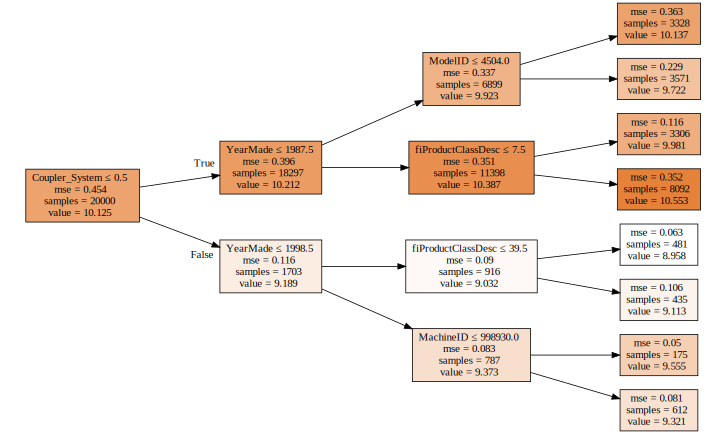

In [34]:
draw_tree(m.estimators_[0], df_trn, precision=3)

In [35]:
m = RandomForestRegressor(n_estimators=1, bootstrap=False, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[5.756054031998178e-17, 0.5063696061725933, 1.0, 0.5420867247355055]


In [36]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.11109141421848111, 0.36789315349064206, 0.9727978761383551, 0.7582917993705661]


In [37]:
preds = np.stack([t.predict(X_val) for t in m.estimators_])
preds[:,0], np.mean(preds[:,0]), y_val[0]

(array([9.10498, 8.9872 , 9.25913, 9.04782, 9.25913, 9.15905, 9.04782, 9.30565, 9.61581, 9.39266]),
 9.2179245672452,
 9.104979856318357)

In [38]:
preds.shape

(10, 12000)

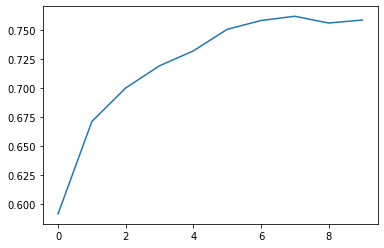

In [39]:
plt.plot([metrics.r2_score(y_val, np.mean(preds[:i+1], axis=0)) for i in range(10)]);

In [40]:
m = RandomForestRegressor(n_estimators=20, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.10246286479925365, 0.3561263363094285, 0.9768593895488824, 0.7735062836927998]


In [41]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.09583062483062907, 0.3487719324976441, 0.9797581378696915, 0.7827643841770437]


In [42]:
m = RandomForestRegressor(n_estimators=80, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.09381235125613338, 0.3518238319508554, 0.9806017806979304, 0.7789459465336437]


In [43]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.0965405186781652, 0.35052585952953397, 0.9794571318633501, 0.780573993145662, 0.8541554677267424]


In [0]:
df_trn, y_trn, nas = proc_df(df_raw, 'SalePrice')
X_train, X_valid = split_vals(df_trn, n_trn)
y_train, y_valid = split_vals(y_trn, n_trn)

In [0]:
set_rf_samples(20000)

In [0]:
# ??set_rf_samples

In [47]:
m = RandomForestRegressor(n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


CPU times: user 10.2 s, sys: 135 ms, total: 10.4 s
Wall time: 6.67 s
[0.24077588823644291, 0.2788869040908374, 0.8788395679206483, 0.8610993697011199, 0.8662568386927616]


In [48]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.22696377344733262, 0.2602081773596947, 0.8923416020766678, 0.879082306249241, 0.8808414897607463]


In [0]:
reset_rf_samples()

In [0]:
def dectree_max_depth(tree):
  children_left = tree.children_left
  children_right = tree.children_right

  def walk(node_id):
    if children_left[node_id] != children_right[node_id]:
      left_max = 1 + walk(children_left[node_id])
      right_max = 1 + walk(children_right[node_id])
      return max(left_max, right_max)
    # Leaf node
    else:
      return 1
    
  root_node_id = 0
  return walk(root_node_id)

In [51]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.07842602087882454, 0.23918960883099358, 0.9871455000355446, 0.8978278361594954, 0.9083698282477386]


In [0]:
t = m.estimators_[0].tree_

In [53]:
print(dectree_max_depth(t))

50


In [57]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True, min_samples_leaf=5)
m.fit(X_train, y_train)
print_score(m)

[0.1888096334089949, 0.24066218945774387, 0.9254953937033829, 0.8965659093026196, 0.8989172515833117]


In [0]:
t = m.estimators_[0].tree_

In [59]:
dectree_max_depth(t)

29

In [70]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True, max_features=None, max_leaf_nodes=4)
m.fit(X_train, y_train)
print_score(m)

[0.5588496490091747, 0.5790648977683893, 0.3472831997955922, 0.4011715122677004, 0.34714787501151456]


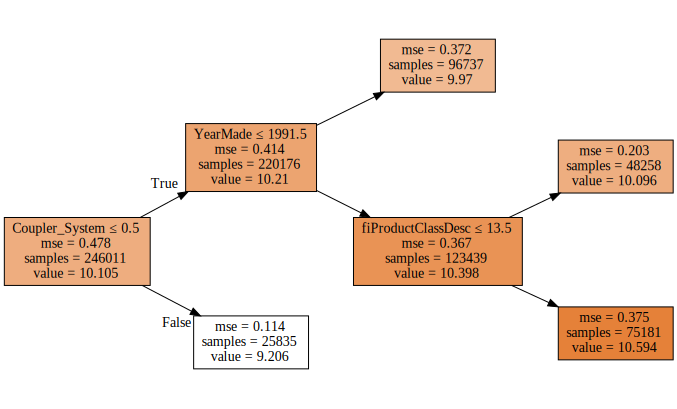

In [75]:
draw_tree(m.estimators_[15], df_trn, precision=3)